# Machine Learning Advanced - Sistemas de Recomendación 

Manuel Montoya Gamio | Data Scientist | Belcorp

## Librerías

In [2]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.__version__

'0.24.2'

In [5]:
np.__version__

'1.16.4'

In [1]:
pip install scikit-surprise

In [6]:
import surprise

ModuleNotFoundError: No module named 'surprise'

In [5]:
surprise.__version__

'1.1.0'

## Dataset

Vamos a utilizar el conjunto de datos MovieLens: https://grouplens.org/datasets/movielens/100k/

In [6]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,user,movie,rating,movie name
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)


In [7]:
ratings.shape

(100000, 4)

In [8]:
ratings['user'].nunique()

943

In [9]:
ratings['movie'].nunique()

1682

In [10]:
ratings['user'].nunique() * ratings['movie'].nunique()

1586126

In [11]:
ratings.shape[0] / (ratings['user'].nunique() * ratings['movie'].nunique())

0.06304669364224531

ratings de un usuario

In [12]:
ratings.head(1)

,user,movie,rating,movie name
0,196,242,3,Kolya (1996)


In [13]:
ratings.query('user == 196')

,user,movie,rating,movie name
0,196,242,3,Kolya (1996)
940,196,393,4,Mrs. Doubtfire (1993)
1133,196,381,4,Muriel's Wedding (1994)
1812,196,251,3,Shall We Dance? (1996)
1896,196,655,5,Stand by Me (1986)
2374,196,67,5,Ace Ventura: Pet Detective (1994)
6910,196,306,4,"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)"
7517,196,238,4,Raising Arizona (1987)
7842,196,663,5,Being There (1979)
10017,196,111,4,"Truth About Cats & Dogs, The (1996)"


In [15]:
ratings.query('user == 196').sort_values(by = 'rating', ascending = False)

,user,movie,rating,movie name
36281,196,285,5,Secrets & Lies (1996)
16834,196,692,5,"American President, The (1995)"
1896,196,655,5,Stand by Me (1986)
2374,196,67,5,Ace Ventura: Pet Detective (1994)
52726,196,153,5,"Fish Called Wanda, A (1988)"
7842,196,663,5,Being There (1979)
13733,196,286,5,"English Patient, The (1996)"
17102,196,8,5,Babe (1995)
42384,196,1007,4,Waiting for Guffman (1996)
50147,196,411,4,"Nutty Professor, The (1996)"


distribución de ratings

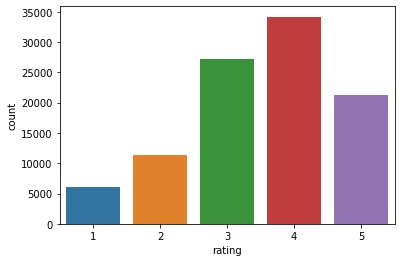

In [16]:
sns.countplot(data = ratings, x = 'rating')

## factorización de matrices

<img src='https://slideplayer.com/slide/4969876/16/images/36/Latent+factor+models+~+~+users+items+users+items.jpg'>

Vamos a darle el formato de la librería a la data que tenemos

In [17]:
ratings.head()

,user,movie,rating,movie name
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)


In [18]:
from surprise import Dataset, Reader

In [19]:
reader = Reader(line_format='user item rating')

In [20]:
surprise_dataset = Dataset.load_from_df(ratings[['user', 'movie', 'rating']], reader)

In [24]:
type(ratings)

pandas.core.frame.DataFrame

In [23]:
type(surprise_dataset)

surprise.dataset.DatasetAutoFolds

In [25]:
from surprise import SVD
from surprise.model_selection import cross_validate

In [26]:
svd = SVD()

In [27]:
resultados = cross_validate(svd, surprise_dataset, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9416  0.9409  0.9358  0.9258  0.9312  0.9351  0.0059  
MAE (testset)     0.7418  0.7406  0.7366  0.7301  0.7355  0.7369  0.0042  
Fit time          4.31    4.26    4.29    4.50    4.32    4.34    0.08    
Test time         0.18    0.11    0.17    0.11    0.17    0.15    0.03    


## train test split

In [29]:
from surprise.model_selection import train_test_split

In [30]:
trainset, testset = train_test_split(surprise_dataset, test_size=.25)

In [33]:
type(trainset)

surprise.trainset.Trainset

In [34]:
type(testset)

list

In [31]:
svd = SVD()

In [32]:
svd.fit(trainset)

In [35]:
predictions = svd.test(testset)

In [36]:
predictions

[Prediction(uid=191, iid=302, r_ui=4.0, est=4.2750106310191995, details={'was_impossible': False}),
 Prediction(uid=201, iid=705, r_ui=3.0, est=3.689963710417624, details={'was_impossible': False}),
 Prediction(uid=753, iid=23, r_ui=2.0, est=3.698586338712424, details={'was_impossible': False}),
 Prediction(uid=95, iid=892, r_ui=3.0, est=2.668811762483261, details={'was_impossible': False}),
 Prediction(uid=446, iid=888, r_ui=1.0, est=2.9464245969917178, details={'was_impossible': False}),
 Prediction(uid=807, iid=298, r_ui=4.0, est=4.301171121724442, details={'was_impossible': False}),
 Prediction(uid=499, iid=272, r_ui=5.0, est=4.237041437710768, details={'was_impossible': False}),
 Prediction(uid=13, iid=520, r_ui=4.0, est=4.476836001541924, details={'was_impossible': False}),
 Prediction(uid=723, iid=9, r_ui=3.0, est=3.269316827147202, details={'was_impossible': False}),
 Prediction(uid=244, iid=537, r_ui=5.0, est=4.492449025475574, details={'was_impossible': False}),
 Prediction(u

In [37]:
type(predictions)

list

In [38]:
predictions[0]

Prediction(uid=191, iid=302, r_ui=4.0, est=4.2750106310191995, details={'was_impossible': False})

In [40]:
df_predictions = pd.DataFrame(predictions)

In [41]:
df_predictions.head(2)

,uid,iid,r_ui,est,details
0,191,302,4.0,4.275011,{'was_impossible': False}
1,201,705,3.0,3.689964,{'was_impossible': False}


In [43]:
df_predictions.query('uid == 191').sort_values(by = 'est', ascending = False)

,uid,iid,r_ui,est,details
0,191,302,4.0,4.275011,{'was_impossible': False}
18267,191,86,5.0,4.089250,{'was_impossible': False}
21026,191,340,4.0,3.503593,{'was_impossible': False}
23384,191,300,4.0,3.503366,{'was_impossible': False}
20352,191,331,4.0,3.420883,{'was_impossible': False}
2263,191,752,3.0,2.874016,{'was_impossible': False}


In [44]:
from surprise import accuracy

In [45]:
accuracy.rmse(predictions)

RMSE: 0.9410


0.9410334290900583

## mejores parámetros

In [46]:
from surprise.model_selection import GridSearchCV
from surprise import SVD

In [47]:
param_grid = {'n_epochs': [5, 10], 
              'n_factors': [20, 50],
              'random_state' : [12345]}

gs = GridSearchCV(SVD, param_grid, measures= ['rmse'], cv=3, )
gs.fit(surprise_dataset)

In [48]:
gs.best_score

{'rmse': 0.9498593070780458}

In [49]:
gs.best_params

{'rmse': {'n_epochs': 10, 'n_factors': 20, 'random_state': 12345}}